# EDA of the Boston Housing Dataset

## Load the dataset

In [8]:
data("BostonHousing2", package = "mlbench")

In [10]:
boston_housing_data <- BostonHousing2

In [13]:
head(boston_housing_data)

,town,tract,lon,lat,medv,cmedv,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,Nahant,2011,-70.9550,42.2550,24.0,24.0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
2,Swampscott,2021,-70.9500,42.2875,21.6,21.6,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
3,Swampscott,2022,-70.9360,42.2830,34.7,34.7,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
4,Marblehead,2031,-70.9280,42.2930,33.4,33.4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,Marblehead,2032,-70.9220,42.2980,36.2,36.2,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
6,Marblehead,2033,-70.9165,42.3040,28.7,28.7,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21


In [15]:
dim(boston_housing_data)

[1] 506  19

## Get Column names and understand the meaning of each column

In [17]:
colnames(boston_housing_data)

[1] "town"    "tract"   "lon"     "lat"     "medv"    "cmedv"   "crim"   
 [8] "zn"      "indus"   "chas"    "nox"     "rm"      "age"     "dis"    
[15] "rad"     "tax"     "ptratio" "b"       "lstat"

| Column Name        |                                Meaning                                | Categorical ? |
| :----------------- | :-------------------------------------------------------------------: | ------------: |
| town               |                             Name of town                              |            ✅ |
| tract              |                       census tract (i.e. year)                        |            ✅ |
| lon                |                               longitude                               |            ❌ |
| lat                |                               latitude                                |            ❌ |
| <mark>~~medv~~</mark>  |                  ~~median-value of owner occupied home~~                 |            ~~❌~~|
| <mark>cmedv</mark> |                            CORRECTED medv                             |            ❌ |
| crim               |                         per capita crime rate                         |            ❌ |
| zn                 |           proportion of residential land zoned            |            ❌ |
| indus              |           proportion of non-retail business acres per town            |            ❌ |
| chas               | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) |            ✅ |
| nox                |          nitric oxides concentration (parts per 10 million)           |            ❌ |
| rm                 |                 average number of rooms per dwelling                  |            ❌ |
| age                |        proportion of owner-occupied units built prior to 1940         |            ❌ |
| dis                |         weighted distances to five Boston employment centres          |            ❌ |
| rad                |               index of accessibility to radial highways               |            ❌ |
| tax                |              full-value property-tax rate per USD 10,000              |            ❌ |
| pratio             |                      pupil-teacher ratio by town                      |            ❌ |
| b                  |    $ 1000(B−0.63)^2$ where $B$ is the proportion of blacks by town    |            ❌ |
| lstat              |             percentage of lower status of the population              |            ❌ |

Target variable: `cmedv` ✅

Variable to ignore: `medv` ❌

All others are input features

## check for missing values

In [19]:
colSums(is.na(boston_housing_data))

town   tract     lon     lat    medv   cmedv    crim      zn   indus    chas 
      0       0       0       0       0       0       0       0       0       0 
    nox      rm     age     dis     rad     tax ptratio       b   lstat 
      0       0       0       0       0       0       0       0       0

we infer that there are NO missing values in the dataset and the dataset is CLEAN

---

## What is the Distrubution of target column `cmedv` ?

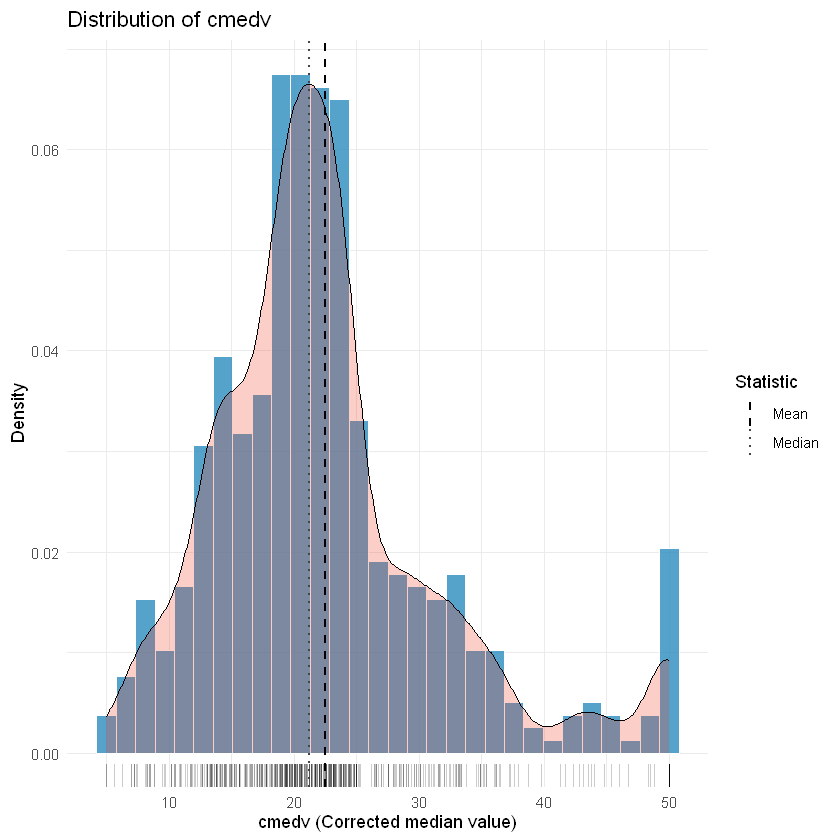

In [25]:
library(ggplot2)

mean_cmedv <- mean(boston_housing_data$cmedv, na.rm = TRUE)
median_cmedv <- median(boston_housing_data$cmedv, na.rm = TRUE)

lines_df <- data.frame(x = c(mean_cmedv, median_cmedv), Statistic = c("Mean", "Median"))

ggplot(boston_housing_data, aes(x = cmedv)) +
    geom_histogram(aes(y = ..density..), bins = 30, fill = "#2b8cbe", color = "white", alpha = 0.8) +
    geom_density(fill = "#f03b20", alpha = 0.25) +
    geom_rug(sides = "b", alpha = 0.2) +
    geom_vline(data = lines_df, aes(xintercept = x, color = Statistic, linetype = Statistic), size = 0.7, show.legend = TRUE) +
    scale_color_manual(name = "Statistic", values = c("Mean" = "#000000", "Median" = "#444444")) +
    scale_linetype_manual(name = "Statistic", values = c("Mean" = "dashed", "Median" = "dotted")) +
    labs(title = "Distribution of cmedv", x = "cmedv (Corrected median value)", y = "Density") +
    theme_minimal()

check for outliers using a boxplot

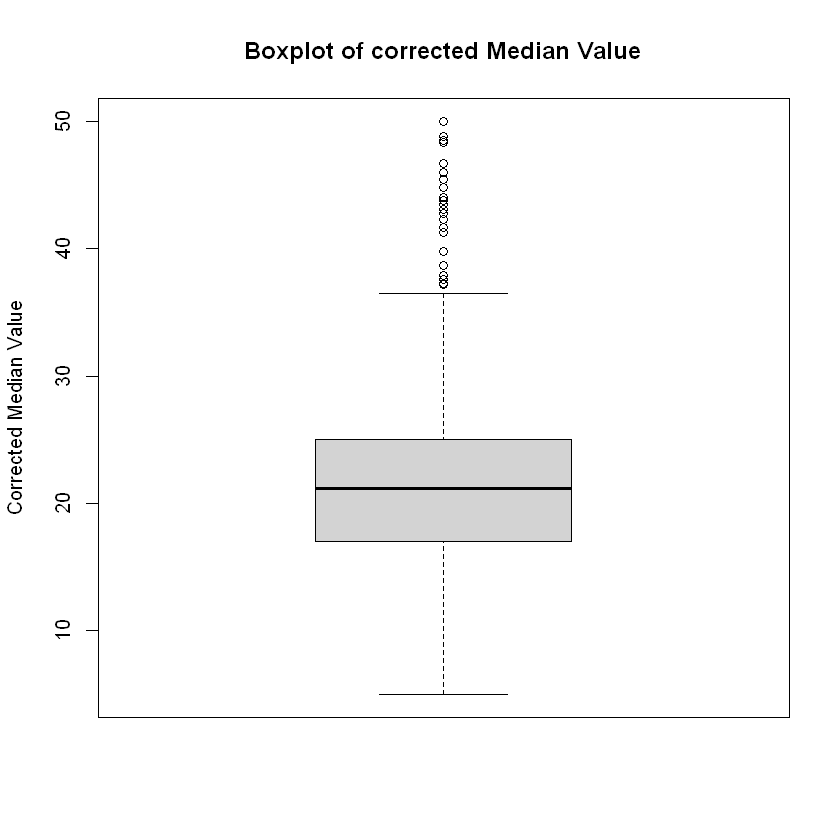

In [26]:
boxplot(boston_housing_data$cmedv, main = "Boxplot of corrected Median Value", ylab = "Corrected Median Value")

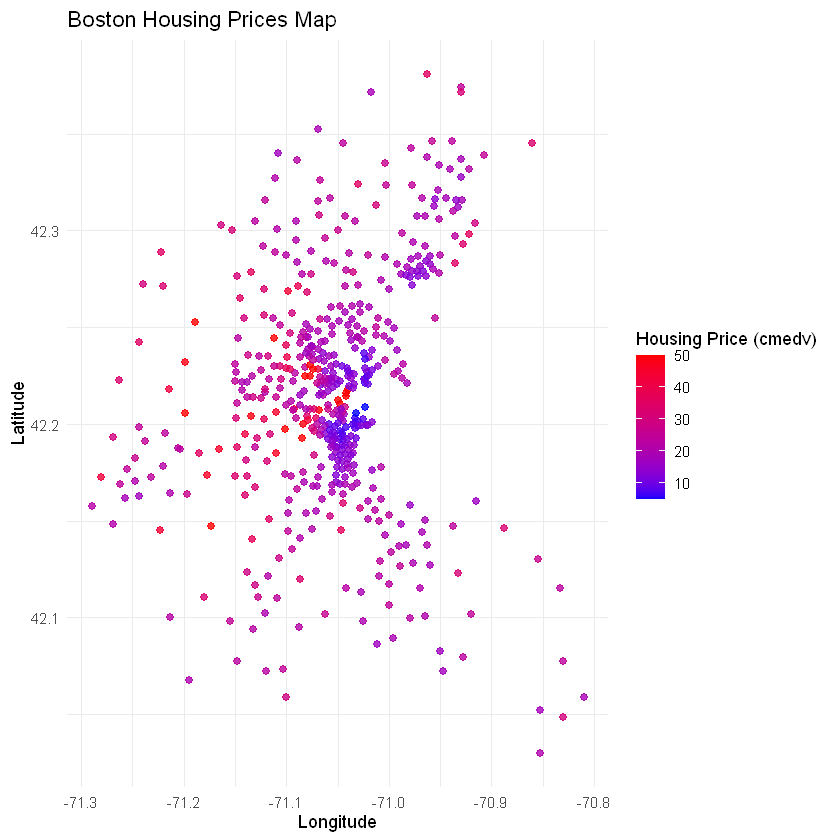

In [41]:
library(ggplot2)

# Scatter plot of housing prices on the map of Boston
ggplot(boston_housing_data, aes(x = lon, y = lat, color = cmedv)) +
  geom_point(alpha = 0.8, size = 2) +
  scale_color_gradient(low = "blue", high = "red", name = "Housing Price (cmedv)") +
  labs(title = "Boston Housing Prices Map", x = "Longitude", y = "Latitude") +
  theme_minimal()

## What are the distributions of key numerical input features ?

Like:
- `crim`
- `nox`
- `b`
- `lstat`

### `crim`

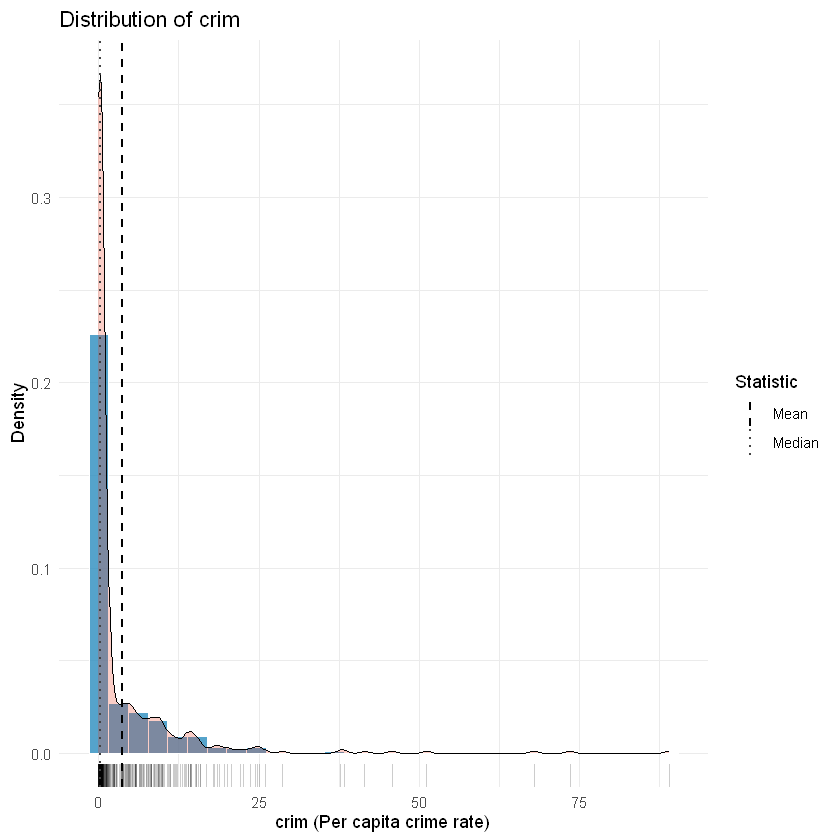

In [51]:
library(ggplot2)

mean_crim <- mean(boston_housing_data$crim, na.rm = TRUE)
median_crim <- median(boston_housing_data$crim, na.rm = TRUE)

lines_df <- data.frame(x = c(mean_crim, median_crim), Statistic = c("Mean", "Median"))

ggplot(boston_housing_data, aes(x = crim)) +
    geom_histogram(aes(y = ..density..), bins = 30, fill = "#2b8cbe", color = "white", alpha = 0.8) +
    geom_density(fill = "#f03b20", alpha = 0.25) +
    geom_rug(sides = "b", alpha = 0.2) +
    geom_vline(data = lines_df, aes(xintercept = x, color = Statistic, linetype = Statistic), size = 0.7, show.legend = TRUE) +
    scale_color_manual(name = "Statistic", values = c("Mean" = "#000000", "Median" = "#444444")) +
    scale_linetype_manual(name = "Statistic", values = c("Mean" = "dashed", "Median" = "dotted")) +
    labs(title = "Distribution of crim", x = "crim (Per capita crime rate)", y = "Density") +
    theme_minimal()

data concentrated. plot it on x-axis log scale

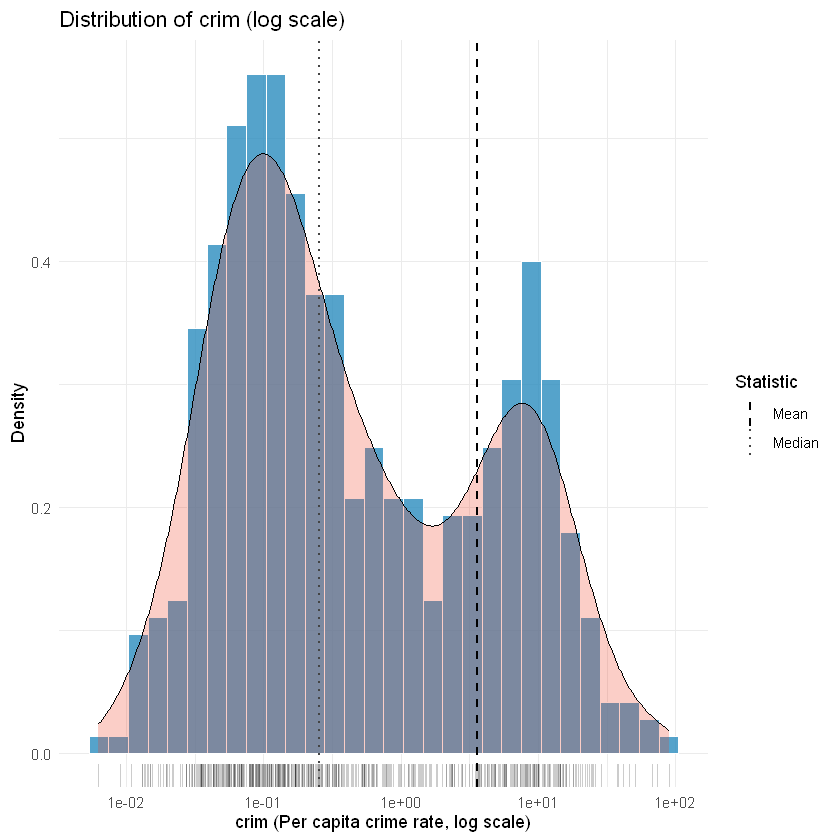

In [49]:
mean_crim <- mean(boston_housing_data$crim + 1e-6, na.rm = TRUE)
median_crim <- median(boston_housing_data$crim + 1e-6, na.rm = TRUE)

lines_df <- data.frame(x = c(mean_crim, median_crim), Statistic = c("Mean", "Median"))

ggplot(boston_housing_data, aes(x = crim + 1e-6)) +
    geom_histogram(aes(y = ..density..), bins = 30, fill = "#2b8cbe", color = "white", alpha = 0.8) +
    geom_density(fill = "#f03b20", alpha = 0.25) +
    geom_rug(sides = "b", alpha = 0.2) +
    geom_vline(data = lines_df, aes(xintercept = x, color = Statistic, linetype = Statistic), size = 0.7, show.legend = TRUE) +
    scale_color_manual(name = "Statistic", values = c("Mean" = "#000000", "Median" = "#444444")) +
    scale_linetype_manual(name = "Statistic", values = c("Mean" = "dashed", "Median" = "dotted")) +
    scale_x_log10() +
    labs(title = "Distribution of crim (log scale)", x = "crim (Per capita crime rate, log scale)", y = "Density") +
    theme_minimal()


check for outliers using a boxplot

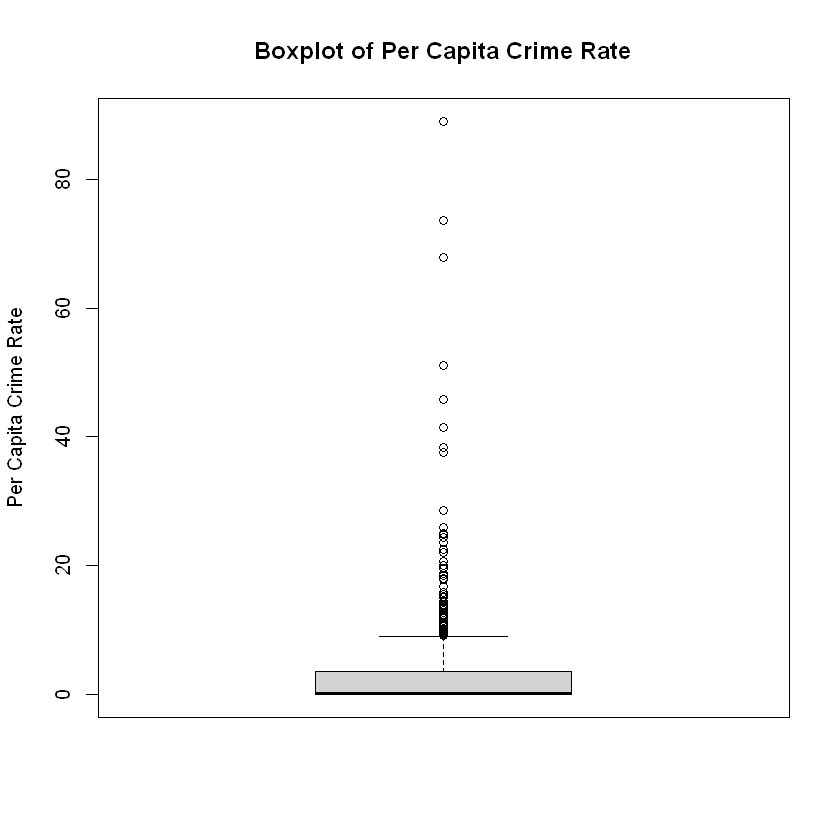

In [47]:
boxplot(boston_housing_data$crim, main = "Boxplot of Per Capita Crime Rate", ylab = "Per Capita Crime Rate")

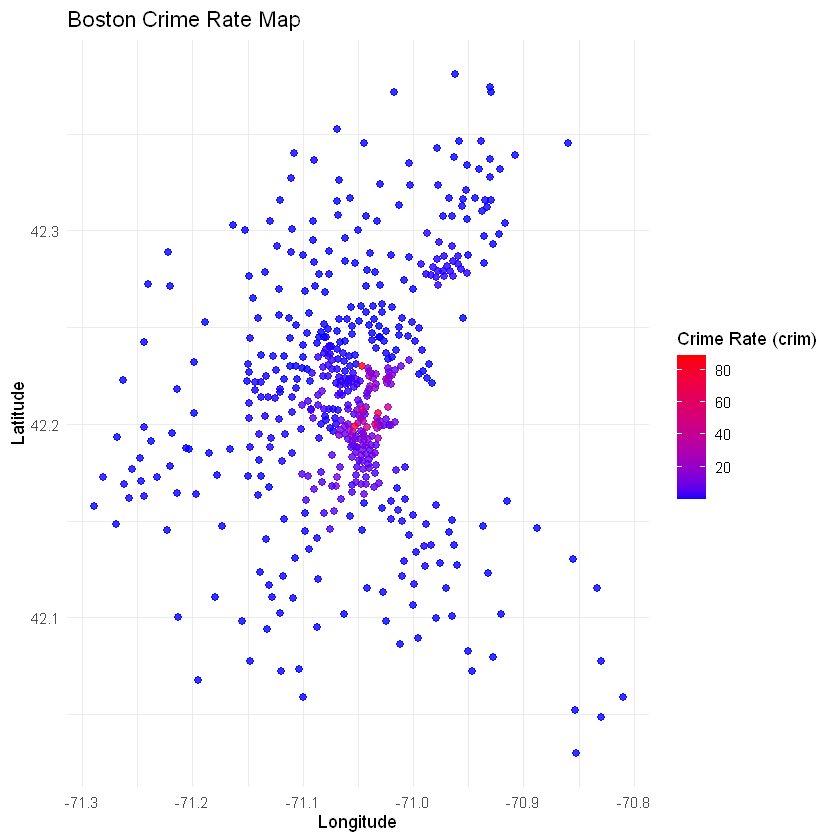

In [50]:
library(ggplot2)

# Scatter plot of crime rates on the map of Boston
ggplot(boston_housing_data, aes(x = lon, y = lat, color = crim)) +
  geom_point(alpha = 0.8, size = 2) +
  scale_color_gradient(low = "blue", high = "red", name = "Crime Rate (crim)") +
  labs(title = "Boston Crime Rate Map", x = "Longitude", y = "Latitude") +
  theme_minimal()

### `nox`

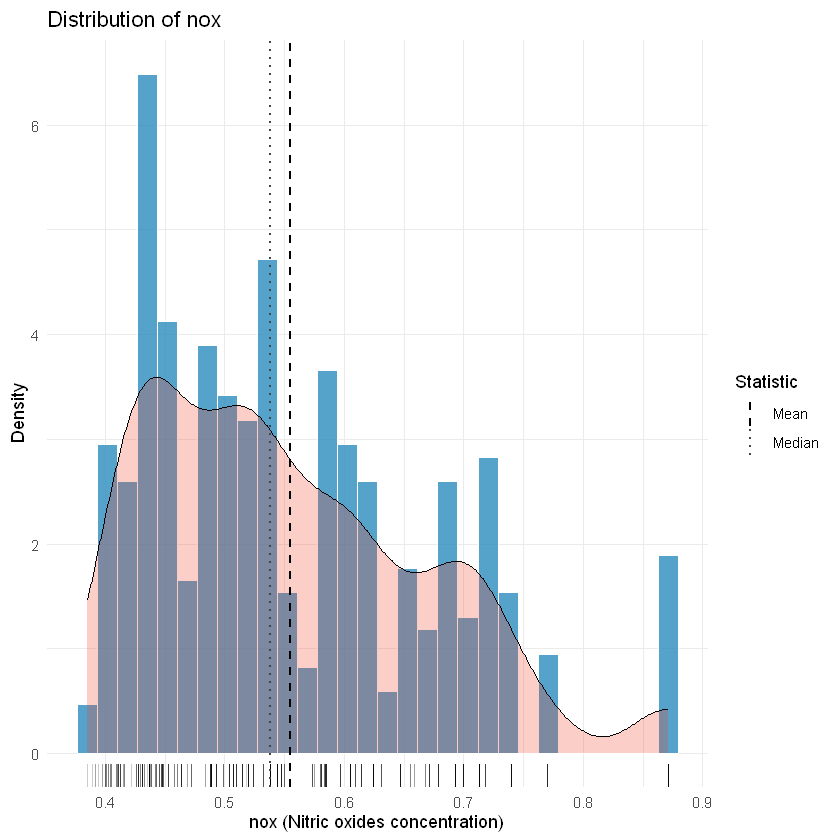

In [52]:
library(ggplot2)

mean_nox <- mean(boston_housing_data$nox, na.rm = TRUE)
median_nox <- median(boston_housing_data$nox, na.rm = TRUE)

lines_df <- data.frame(x = c(mean_nox, median_nox), Statistic = c("Mean", "Median"))

ggplot(boston_housing_data, aes(x = nox)) +
    geom_histogram(aes(y = ..density..), bins = 30, fill = "#2b8cbe", color = "white", alpha = 0.8) +
    geom_density(fill = "#f03b20", alpha = 0.25) +
    geom_rug(sides = "b", alpha = 0.2) +
    geom_vline(data = lines_df, aes(xintercept = x, color = Statistic, linetype = Statistic), size = 0.7, show.legend = TRUE) +
    scale_color_manual(name = "Statistic", values = c("Mean" = "#000000", "Median" = "#444444")) +
    scale_linetype_manual(name = "Statistic", values = c("Mean" = "dashed", "Median" = "dotted")) +
    labs(title = "Distribution of nox", x = "nox (Nitric oxides concentration)", y = "Density") +
    theme_minimal()

check for outliers using a boxplot

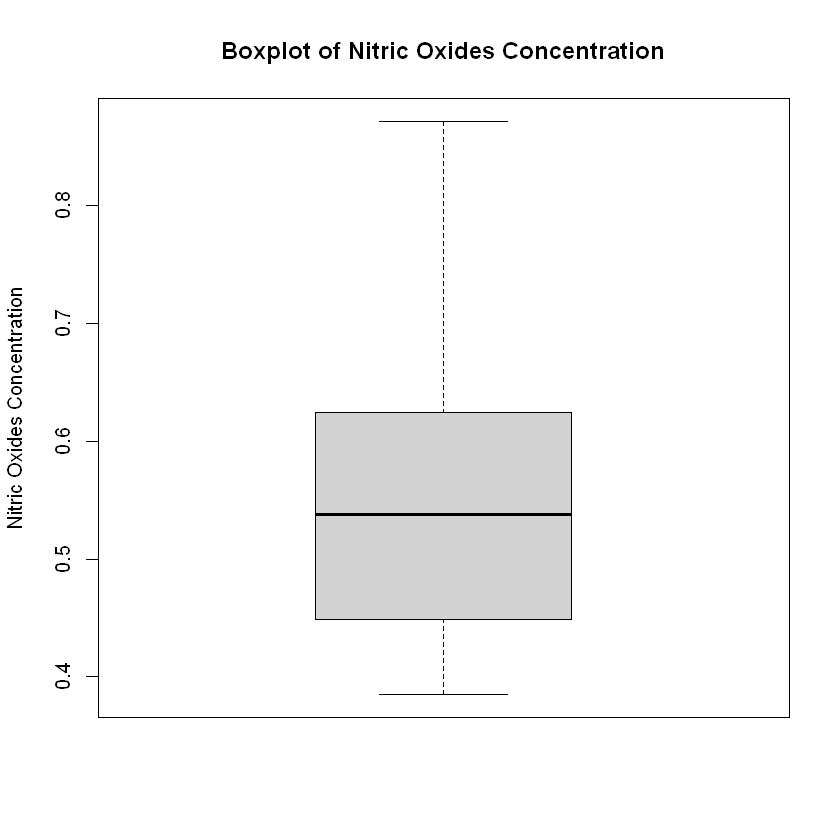

In [53]:
boxplot(boston_housing_data$nox, main = "Boxplot of Nitric Oxides Concentration", ylab = "Nitric Oxides Concentration")

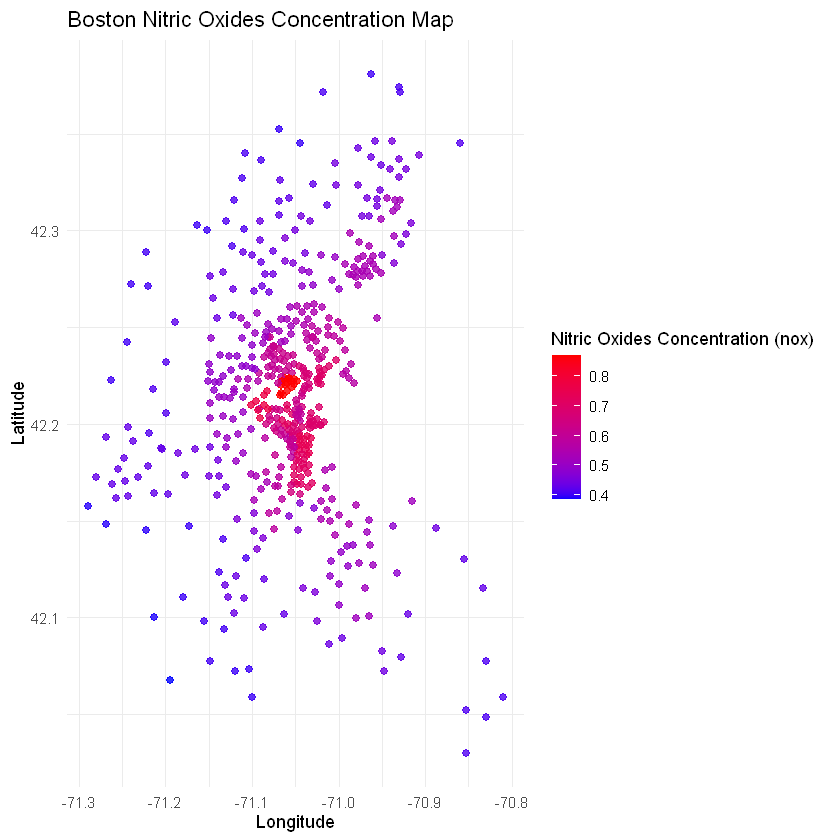

In [54]:
library(ggplot2)

# Scatter plot of Nitric Oxides Concentration on the map of Boston
ggplot(boston_housing_data, aes(x = lon, y = lat, color = nox)) +
  geom_point(alpha = 0.8, size = 2) +
  scale_color_gradient(low = "blue", high = "red", name = "Nitric Oxides Concentration (nox)") +
  labs(title = "Boston Nitric Oxides Concentration Map", x = "Longitude", y = "Latitude") +
  theme_minimal()

### `b`

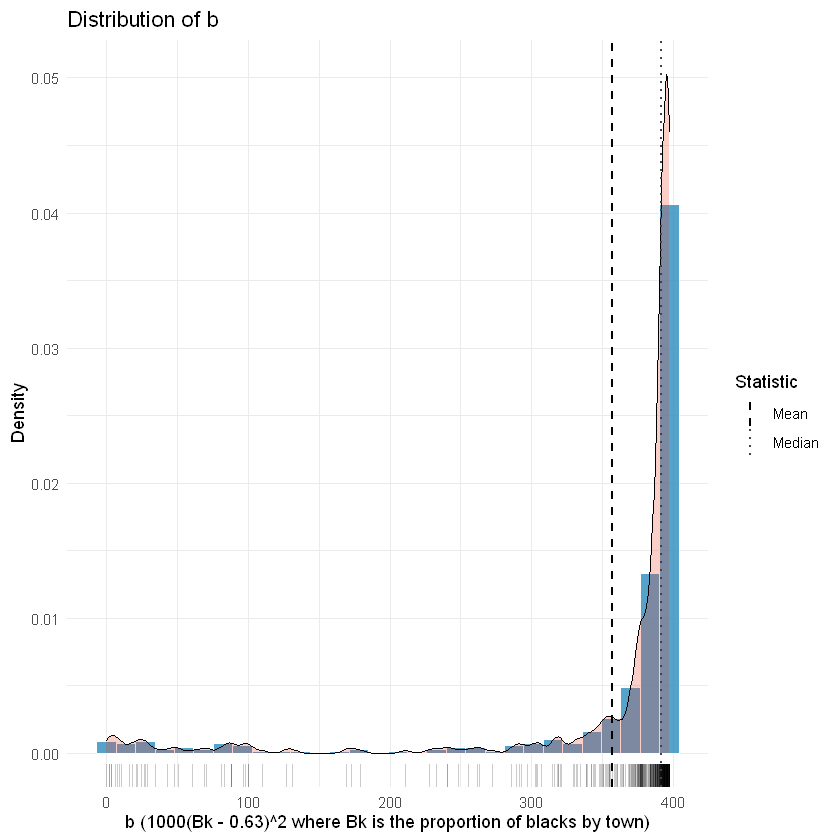

In [55]:
library(ggplot2)

mean_nox <- mean(boston_housing_data$b, na.rm = TRUE)
median_nox <- median(boston_housing_data$b, na.rm = TRUE)

lines_df <- data.frame(x = c(mean_nox, median_nox), Statistic = c("Mean", "Median"))

ggplot(boston_housing_data, aes(x = b)) +
    geom_histogram(aes(y = ..density..), bins = 30, fill = "#2b8cbe", color = "white", alpha = 0.8) +
    geom_density(fill = "#f03b20", alpha = 0.25) +
    geom_rug(sides = "b", alpha = 0.2) +
    geom_vline(data = lines_df, aes(xintercept = x, color = Statistic, linetype = Statistic), size = 0.7, show.legend = TRUE) +
    scale_color_manual(name = "Statistic", values = c("Mean" = "#000000", "Median" = "#444444")) +
    scale_linetype_manual(name = "Statistic", values = c("Mean" = "dashed", "Median" = "dotted")) +
    labs(title = "Distribution of b", x = "b (1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town)", y = "Density") +
    theme_minimal()

check for outliers using a boxplot

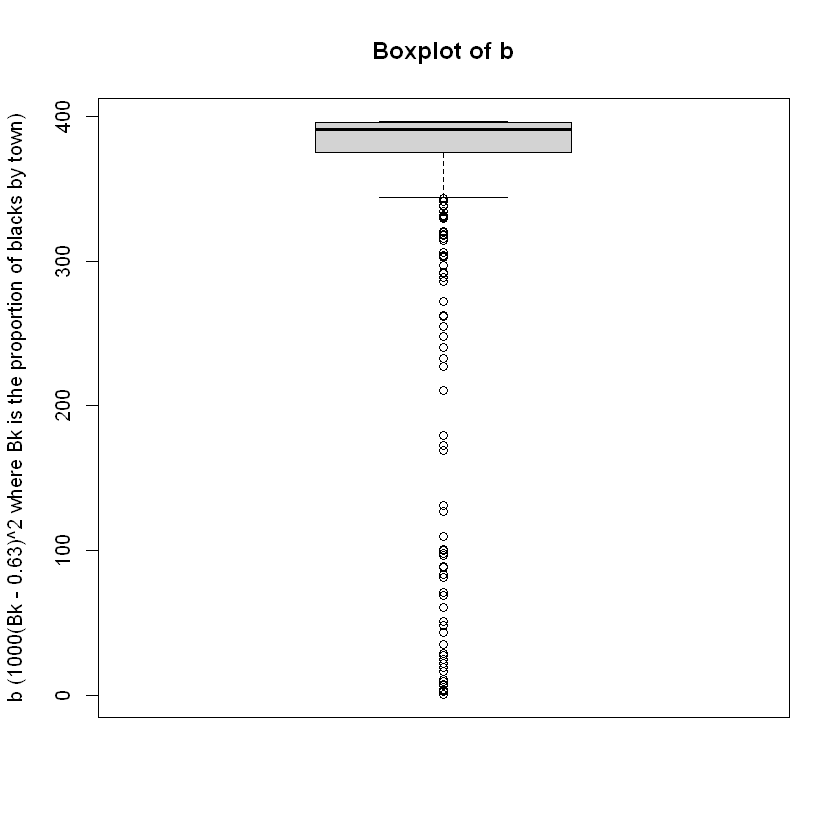

In [58]:
boxplot(boston_housing_data$b, main = "Boxplot of b", ylab = "b (1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town)")

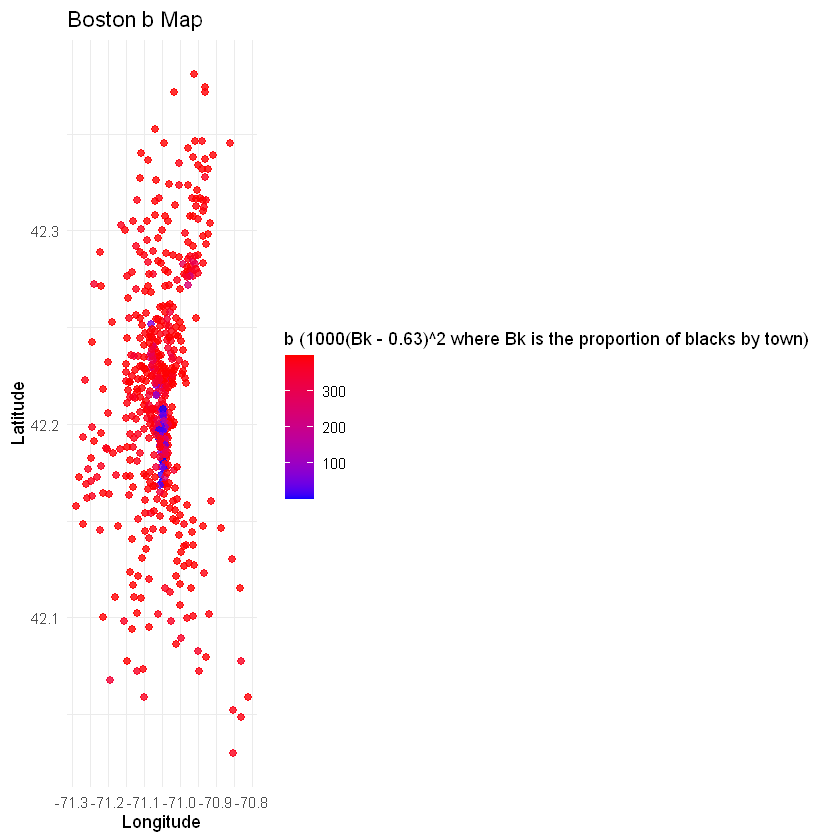

In [59]:
library(ggplot2)

# Scatter plot of b on the map of Boston
ggplot(boston_housing_data, aes(x = lon, y = lat, color = b)) +
  geom_point(alpha = 0.8, size = 2) +
  scale_color_gradient(low = "blue", high = "red", name = "b (1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town)") +
  labs(title = "Boston b Map", x = "Longitude", y = "Latitude") +
  theme_minimal()

### `lstat`

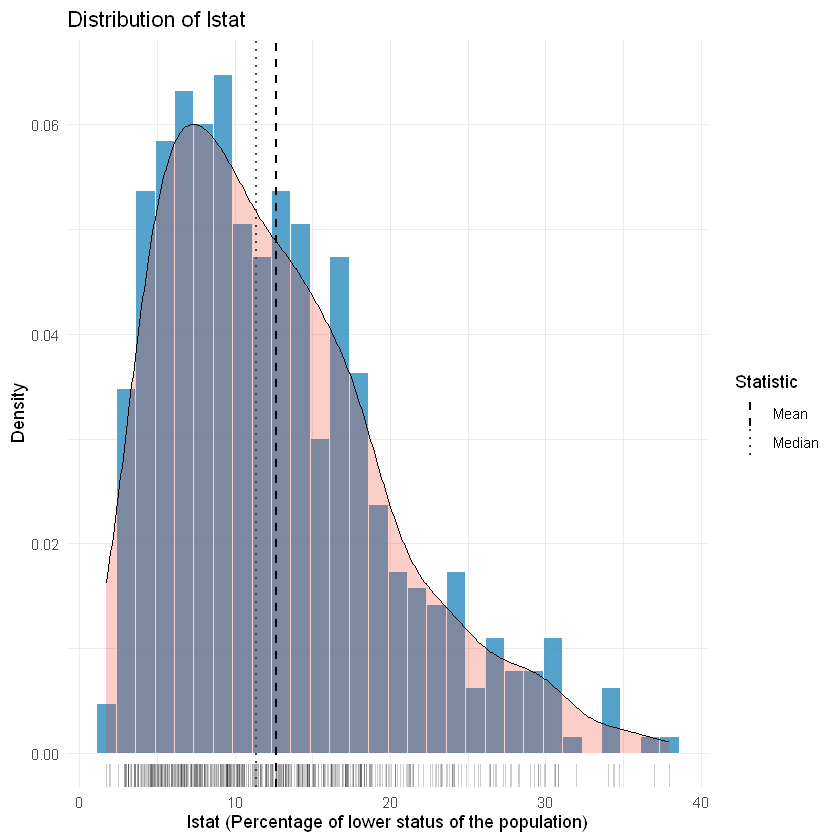

In [60]:
library(ggplot2)

mean_lstat <- mean(boston_housing_data$lstat, na.rm = TRUE)
median_lstat <- median(boston_housing_data$lstat, na.rm = TRUE)

lines_df <- data.frame(x = c(mean_lstat, median_lstat), Statistic = c("Mean", "Median"))

ggplot(boston_housing_data, aes(x = lstat)) +
    geom_histogram(aes(y = ..density..), bins = 30, fill = "#2b8cbe", color = "white", alpha = 0.8) +
    geom_density(fill = "#f03b20", alpha = 0.25) +
    geom_rug(sides = "b", alpha = 0.2) +
    geom_vline(data = lines_df, aes(xintercept = x, color = Statistic, linetype = Statistic), size = 0.7, show.legend = TRUE) +
    scale_color_manual(name = "Statistic", values = c("Mean" = "#000000", "Median" = "#444444")) +
    scale_linetype_manual(name = "Statistic", values = c("Mean" = "dashed", "Median" = "dotted")) +
    labs(title = "Distribution of lstat", x = "lstat (Percentage of lower status of the population)", y = "Density") +
    theme_minimal()

check for outliers using a boxplot

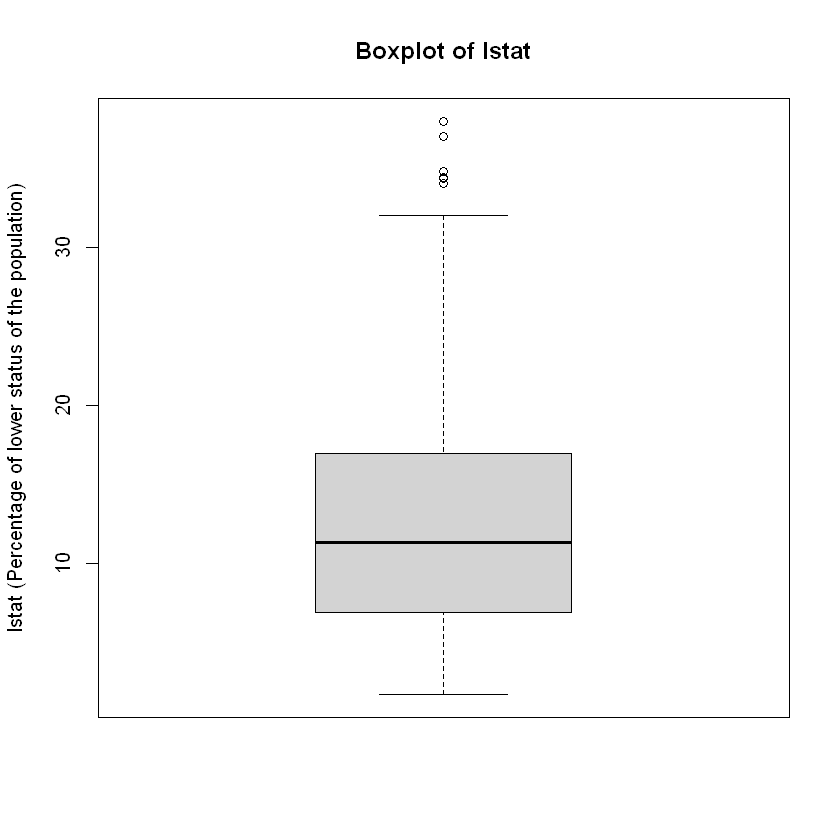

In [61]:
boxplot(boston_housing_data$lstat, main = "Boxplot of lstat", ylab = "lstat (Percentage of lower status of the population)")

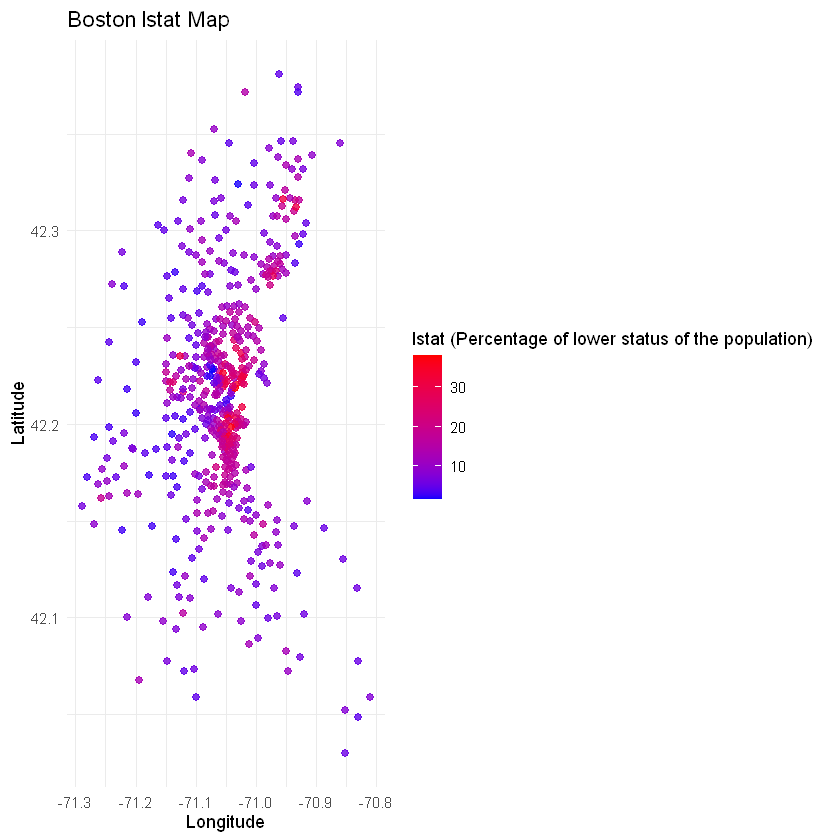

In [62]:
library(ggplot2)

# Scatter plot of lstat on the map of Boston
ggplot(boston_housing_data, aes(x = lon, y = lat, color = lstat)) +
  geom_point(alpha = 0.8, size = 2) +
  scale_color_gradient(low = "blue", high = "red", name = "lstat (Percentage of lower status of the population)") +
  labs(title = "Boston lstat Map", x = "Longitude", y = "Latitude") +
  theme_minimal()

## Correlation between the target variable `cmedv` and the key input features like `crim`, `nox`, `b` and `lstat`

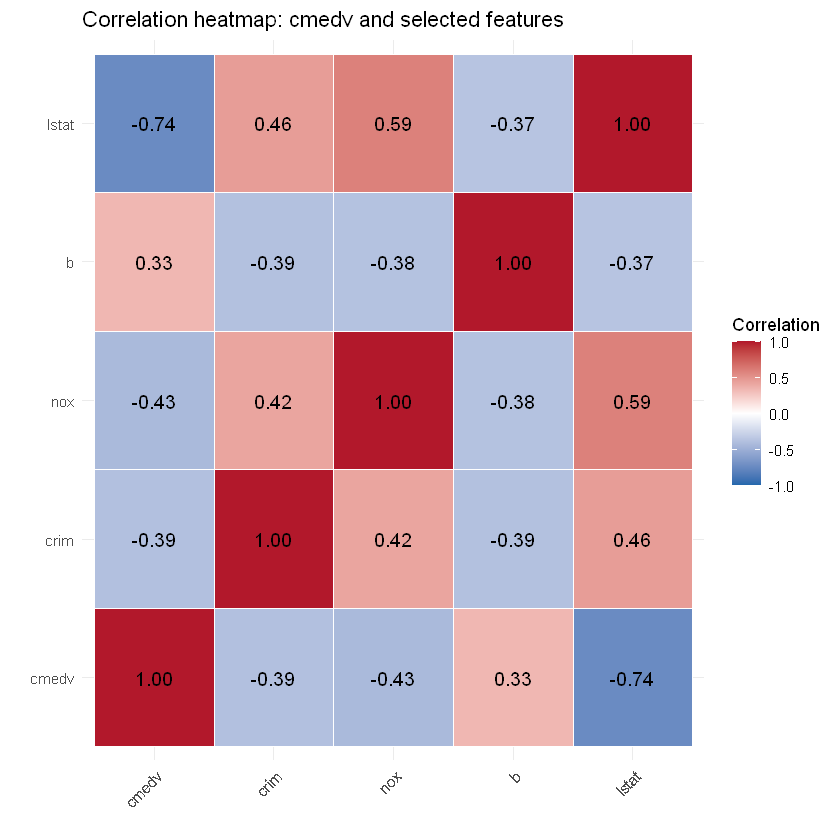

In [63]:
# Correlation heatmap for cmedv, crim, nox, b, lstat
vars <- c("cmedv", "crim", "nox", "b", "lstat")
cor_mat <- cor(boston_housing_data[, vars], use = "complete.obs")
cor_df <- as.data.frame(as.table(cor_mat))
colnames(cor_df) <- c("Var1", "Var2", "Correlation")

ggplot(cor_df, aes(x = Var1, y = Var2, fill = Correlation)) +
    geom_tile(color = "white") +
    scale_fill_gradient2(low = "#2166ac", mid = "white", high = "#b2182b", midpoint = 0, limits = c(-1, 1)) +
    geom_text(aes(label = sprintf("%.2f", Correlation)), size = 4) +
    labs(title = "Correlation heatmap: cmedv and selected features", x = "", y = "") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

interesting the `lstat` shows highest negative correlation with  `cmedv`

## NEXT STEPS

- [ ] Analyse other numerical variables
- [ ] Analyse the categorical variables
- [ ] Temporal trends ?